In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, fowlkes_mallows_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from Config import df

/Users/davinanaya/Desktop/ELE-Machine-Learning/repo


### a.) Extracción de caracteristicas y columnas

In [2]:
cards = df[["C1", "C2", "C3", "C4", "C5"]]
# suits = df[["S1", "S2", "S3", "S4", "S5"]]

# Separando los datos en características y objetivo
X = cards # df.drop(['CLASS'] + list(allColumns.columns), axis=1)
y = df['CLASS']
X

,C1,C2,C3,C4,C5
0,10,11,13,12,1
1,11,13,10,12,1
2,12,11,13,10,1
3,10,11,1,13,12
4,1,13,12,11,10
...,...,...,...,...,...
1025005,1,12,9,9,6
1025006,3,5,7,4,3
1025007,11,7,9,13,7
1025008,11,8,1,13,8


In [3]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#Decision Tree Classifier
print("---------- DecisionTreeClassifier ----------")
hands_fit = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_pred = hands_fit.predict(X_test)
scores = cross_val_score(hands_fit, X, y, cv=5)
print("Completado con una precisión de: ", scores, "\n")
print(classification_report(y_test, y_pred))
fmi = fowlkes_mallows_score(y_test, y_pred)
print("Fowlkes-Mallows Index:", fmi)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


---------- DecisionTreeClassifier ----------
Completado con una precisión de:  [0.9670491  0.96708813 0.9682247  0.96821007 0.96813202] 



/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    102428
           1       0.97      0.97      0.97     86945
           2       0.90      0.87      0.88      9691
           3       0.90      0.86      0.88      4352
           4       0.90      0.91      0.90       808
           5       0.01      0.00      0.00       405
           6       0.57      0.57      0.57       308
           7       0.67      0.47      0.55        60
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.97    205002
   macro avg       0.59      0.56      0.57    205002
weighted avg       0.97      0.97      0.97    205002

Fowlkes-Mallows Index: 0.955347584323093


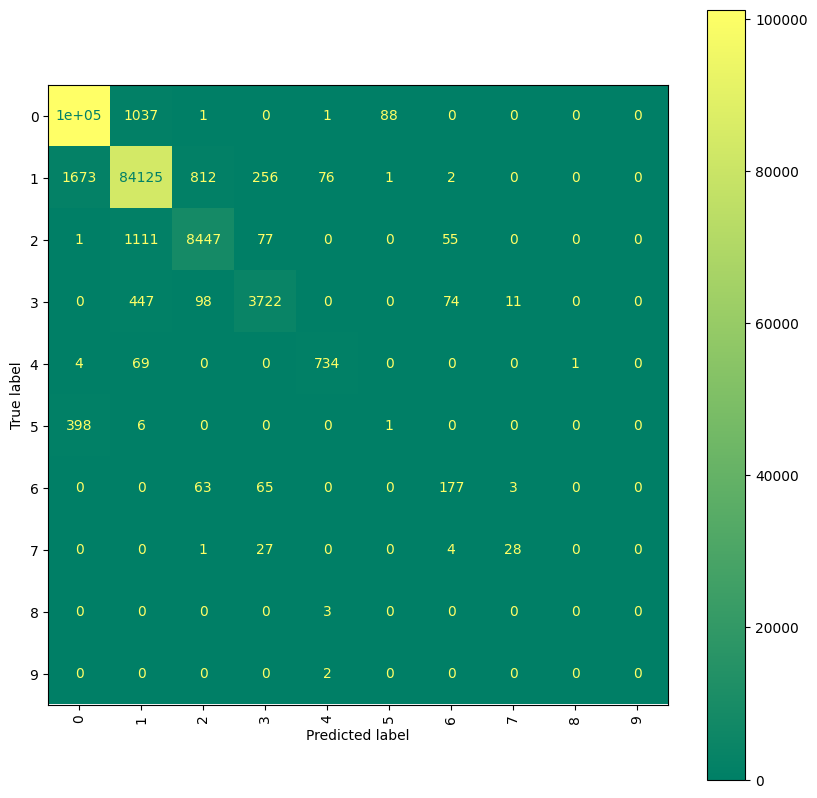

In [5]:
result_confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = result_confusion_matrix)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = cm_display.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [6]:
# Random Forest Classifier
print("---------- RandomForestClassifier ----------")
fit = RandomForestClassifier(random_state=1).fit(X_train, y_train)
y_predV2 = fit.predict(X_test)
scores = cross_val_score(fit, X, y, cv=5)
print("Completado con una precisión de: ", scores, "\n")
print(classification_report(y_test, y_predV2))
fmiV2 = fowlkes_mallows_score(y_test, y_predV2)
print("Fowlkes-Mallows Index:", fmiV2)
accuracy = accuracy_score(y_test, y_predV2)
print("Accuracy Score:", accuracy)

---------- RandomForestClassifier ----------
Completado con una precisión de:  [0.97411733 0.97412708 0.97503927 0.97429781 0.9740783 ] 



/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davinanaya/opt/anaconda3/envs/ml-imgs/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    102428
           1       0.97      0.99      0.98     86945
           2       0.95      0.81      0.87      9691
           3       0.96      0.82      0.89      4352
           4       0.97      0.91      0.94       808
           5       0.01      0.00      0.00       405
           6       0.93      0.55      0.69       308
           7       1.00      0.20      0.33        60
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.98    205002
   macro avg       0.68      0.53      0.57    205002
weighted avg       0.97      0.98      0.97    205002

Fowlkes-Mallows Index: 0.9695310520617076


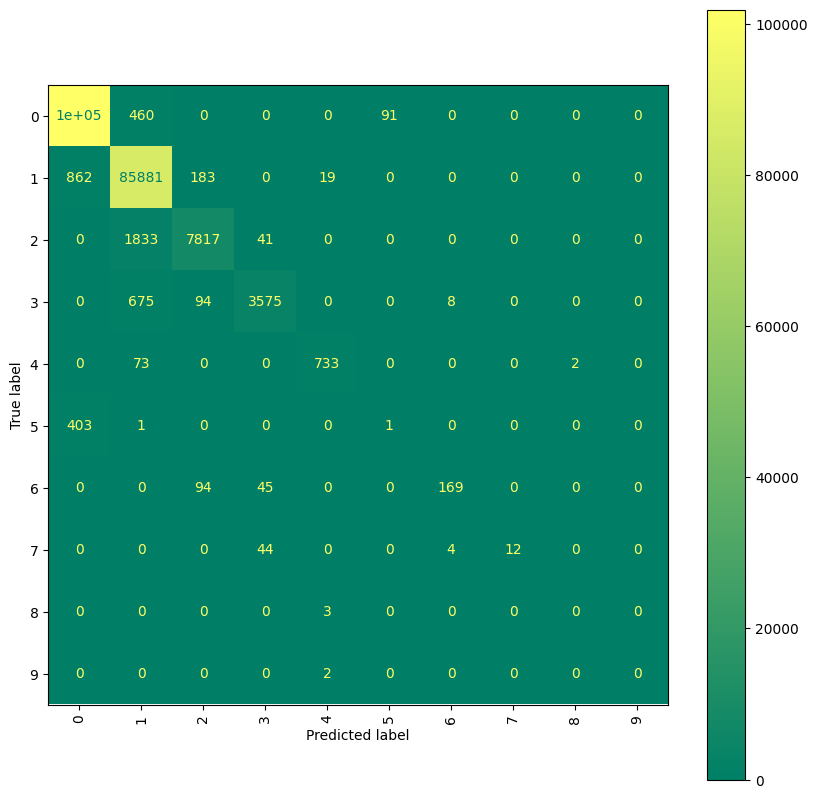

In [7]:
result_confusion_matrixV2 = confusion_matrix(y_test, y_predV2)
cm_displayV2 = ConfusionMatrixDisplay(confusion_matrix = result_confusion_matrixV2)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = cm_displayV2.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [8]:
# SVM Classifier
print("---------- SupportVectorMachine ----------")
svm_classifier = SVC(kernel='linear').fit(X_train, y_train)
y_predV3 = svm_classifier.predict(X_test)
scores = cross_val_score(svm_classifier, X, y, cv=5)
print("Completado con una precisión de: ", scores, "\n")
print(classification_report(y_test, y_predV3))
fmiV3 = fowlkes_mallows_score(y_test, y_predV3)
print("Fowlkes-Mallows Index:", fmiV3)
accuracy = accuracy_score(y_test, y_predV3)
print("Accuracy Score:", accuracy)

---------- SupportVectorMachine ----------


In [ ]:
result_confusion_matrixV3 = confusion_matrix(y_test, y_predV3)
cm_displayV3 = ConfusionMatrixDisplay(confusion_matrix = result_confusion_matrixV3)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = cm_displayV3.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()